## EDA ON Entity Tags From BanglaKit DATASET

In [7]:
import json
lines = []
with open("merge_all_data_and_main_jsonl.json", 'r') as file:
    for line in file:
        print(line)
        break
        
        





# for line in lines:
#     line = json.loads(line)
# lines[0]

[



In [7]:
import json
lines = []
with open("../data/main.jsonl", 'r') as file:
    for line in file:
        line = line.strip()  
        lines.append(line)
lines[0]

'["অগ্রণী ব্যাংকের জ্যেষ্ঠ কর্মকর্তা পদে নিয়োগ পরীক্ষার প্রশ্নপত্র ফাঁসের অভিযোগ উঠেছে।", ["B-ORG", "L-ORG", "O", "O", "O", "O", "O", "O", "O", "O", "O", "O"]]'

### Total Number of sentences

In [8]:
len(lines)

3545

In [9]:
from collections import defaultdict
unique_labels = defaultdict(int)
for line in lines:
    line = json.loads(line)
    text, labels = line[0], line[1]
    for label in labels:
        unique_labels[label] = unique_labels[label] + 1
        
unique_labels['O']

63109

In [10]:
# removing no entity label as it is huge compare to other label
del unique_labels['O']

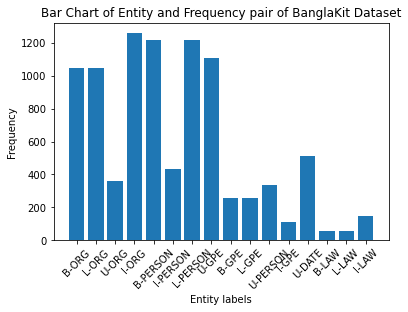

In [12]:
import matplotlib.pyplot as plt

def plot_bar_chart(data_dict):
    keys = data_dict.keys()
    values = data_dict.values()
    
    plt.bar(keys, values)
    plt.xlabel('Entity labels')
    plt.ylabel('Frequency')
    plt.title('Bar Chart of Entity and Frequency pair of BanglaKit Dataset')
    plt.xticks(rotation=45)
    plt.show()

plot_bar_chart(unique_labels)


## EDA ON ENTITY LABELS ON BENGALI-NER DATASET

In [15]:
lines = []
unique_label_banglaner = defaultdict(int)
with open("../data/all_data.txt", 'r') as file:
    for line in file:
        line = line.strip()
        line = line.replace('\ufeff', '')
        if not line or len(line.split('\t')) != 2:
            continue
            
        text, tag = line.split('\t')
        
        unique_label_banglaner[tag] = unique_label_banglaner[tag] + 1
        lines.append(line)
        
len(lines)

96660

In [16]:
del unique_label_banglaner['O']

In [ ]:
import matplotlib.pyplot as plt

def plot_bar_chart(data_dict):
    keys = data_dict.keys()
    values = data_dict.values()
    
    plt.bar(keys, values)
    plt.xlabel('Entity labels')
    plt.ylabel('Frequency')
    plt.title('Bar Chart of Entity and Frequency pair of Bengali-NER Dataset')
    plt.xticks(rotation=45)

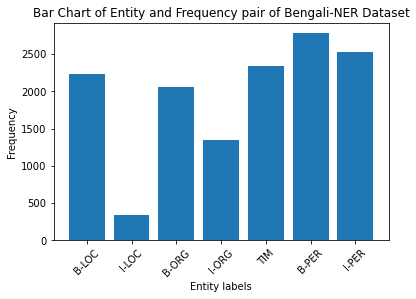

In [17]:
    plt.show()

plot_bar_chart(unique_label_banglaner)

## Findings

Number of entity labels are not properly distributed and equal. As currently we are focusing only person entity label. So we can discard other entity label.

In [3]:
!pip install  spacy
!pip install spacy-transformers

  Using cached spacy_transformers-1.2.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (193 kB)
     |██▉                             | 54.2 MB 10 kB/s eta 14:58:263ERROR: Exception:
Traceback (most recent call last):
  File "/home/aminul/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/home/aminul/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/home/aminul/anaconda3/lib/python3.9/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/home/aminul/anaconda3/lib/python3.9/http/client.py", line 463, in read
    n = self.readinto(b)
  File "/home/aminul/anaconda3/lib/python3.9/http/client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "/home/aminul/anaconda3/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_in

In [4]:
text_list = [
    "বিএনপি নেতাদের সবচেয়ে বড় দুর্বলতা তাঁরা রাজনৈতিক কর্মী আর সন্ত্রাসী গুলিয়ে ফেলেছেন বলে মন্তব্য করেছেন তথ্যমন্ত্রী হাছান মাহমুদ",
    "আব্দুর রহিম নামের কাস্টমারকে একশ টাকা বাকি দিলাম",
    "পুতিনের দুর্বলতা ফাঁস করে দিয়েছে ভাগনার",
    "এবার বাবা শাহরুখের ছবিতে অভিনয় করবেন সুহানা",
    "বিনা প্রতিদ্বন্দ্বিতায় বান্দরবান পৌরসভার মেয়র হলেন আওয়ামী লীগের শামসুল",
    "রাত সাড়ে নয়টার দিকে রিটার্নিং কর্মকর্তা ফয়সল কাদের বেসরকারিভাবে আওয়ামী লীগের প্রার্থী মো. আনোয়ারুজ্জামান চৌধুরীকে বিজয়ী ঘোষণা করেন",
    " যাঁরা জায়েদ খানের পারফরম্যান্স দেখতে চান, তাঁরা আগামী দিনে ওয়াশিংটনে গেলে দেখতে পাবেন।",
    "হাট এলাকার এক বাসিন্দা লোকমান বলেন, এসব মাংস পরিবারের খাবারের জন্য কিছুটা রেখে বাকি মাংস হাটে এনে কম দামে বিক্রি করে সংসারের খরচ মেটান অনেকেই।",  
    "কটিয়াদীর গছিহাটা থেকে আসা সবুজ বলেন, আমি গরীব অসহায় লোক। সাত কেজি মাংস পাইছি, রান্নার জন্য দুই কেজি রাইখা বাকিটা বেইচা দিচ্ছি।" ,
    "ফিরোজায় খালেদা জিয়ার সঙ্গে ছয় নেতার ঈদের শুভেচ্ছা বিনিময়",
    "বিএনপি চেয়ারপারসন আমাদের মাধ্যমে দেশবাসীকে ঈদের শুভেচ্ছা ঈদ মোবারক জানিয়েছেন।",
    "ড. হাছান বলেন, দেশ যখন জননেত্রী শেখ হাসিনার নেতৃত্বে এগিয়ে যাচ্ছে, তখন দেশি-বিদেশি নানা ষড়যন্ত্র শুরু হয়েছে।",
    "বিভেদ ভুলে ঐক্যবদ্ধ হওয়ার আহ্বান ওবায়দুল কাদেরের",
    "বিদেশি তিন শিক্ষার্থীরা হলেন মোহাম্মদ আলম, রাম মেহেতা ও রাবি কুমার যাদব।",
    "বিশ্ববিদ্যালয়ের কোষাধ্যক্ষ অধ্যাপক ড. নেওয়াজ মোহাম্মদ বাহাদুর বলেন, তাদের সঙ্গে ঈদ আনন্দ ভাগাভাগি করতে পেরে আমরাও আনন্দিত।",
    "ক্যারিয়ারের সায়াহ্নে থাকা শন উইলিয়ামস তিনে নেমে আরো একটি অবিশ্বাস্য ইনিংস উপহার দেন।",
    "ক্যানভাসে চোখ রেখে আবারও ছবি তুলতে চান ফটো সাংবাদিক রিপন",
    "সাংবাদিকদের মাধ্যমে সারা দেশের মানুষকে ঈদের শুভেচ্ছা জানান সাকিব আল হাসান",
    "আগুন নিয়ন্ত্রণে ফায়ার সার্ভিসের ১২টি ইউনিট সেখানে গেছে বলে জানিয়েছেন ফায়ার সার্ভিস ও সিভিল ডিফেন্সের মিডিয়া সেলের কর্মকর্তা আনোয়ার হোসেন।",
    "বাড়ি আনার পর বাছুরটি নিয়ে ব্যস্ত হয়ে পড়ে আকরামের ছোট্ট মেয়ে অর্থি।",
    "তবে সবচেয়ে বেশি ক্ষোভ দেখা গেছে সাধারণ সম্পাদক পদ পাওয়া আমিনুল হককে নিয়ে। ",
    "ওই প্রতিবেদনে চুরির জন্য জিম্মাদার হিসেবে রুহুল্লাহ চৌধুরীর দায় রয়েছে বলে উল্লেখ করা হয়।",
    "পুলিশ জানায়, গ্রেপ্তার সোহাগ আলী প্রাথমিক জিজ্ঞাসাবাদে রুবেল শেখ হত্যাকাণ্ডে জড়িত থাকার কথা স্বীকার করেছেন।",
    "‘বিগ বস’ থেকে বিদায়ের পর সালমানকে ধুয়ে দিলেন আলিয়া সিদ্দিকী",
    "ঢালিউডের একসময়ের দাপুটে অভিনয়শিল্পী শাবনূর এখন অস্ট্রেলিয়া থাকেন।",
    "রাজশাহী সিটি করপোরেশন নির্বাচনে এক রকম নিরুত্তাপ ভোটে টানা দ্বিতীয়বারের মতো নির্বাচিত হয়েছেন খায়রুজ্জামান।",
    "নগরের বাদুড়তলা ঈদগাহ মাঠে নামাজ আদায় করেছেন বিএনপির রাজশাহী মহানগরের আহ্বায়ক এরশাদ আলী।",
    "ঈদের দিন কাজে ব্যস্ত নরসিংদী ফায়ার সার্ভিসের ফায়ার ফাইটার আতিকুল ইসলাম ।",
    "ঈদের দিন নরসিংদীতে সোনালী ব্যাকের এটিএম বুথে নিরাপত্তার দায়িত্বে নিয়োজিত মো. আমির হোসেন ।",
    "ঈদের দিন নরসিংদী শহরে ব্যাটারিচালিত রিকশা চালাচ্ছেন নীলফামারীর ডিমলা এলাকার আবু তালেব ।",
    "সবজির বাগান করে মাসে লাখ টাকা আয় করেন আবদুল হালিম ও ওসমান গণি।",
    " ষাটোর্ধ্ব আক্কাস আলী বলেন, নাতির সঙ্গে মোটরসাইকেলে করে সেতু দেখতে এসেছেন তিনি।",
    "সেতুতে যানজট নিরসনে কাজ করছিলেন কুমারখালী পুলিশ ফাঁড়ির পরিদর্শক শফিকুল ইসলাম। ",
    "অটোরিকশাচালক মামুন ঈদের সময় বাড়তি আয়ের আশায় চুক্তিতে কোরবানির পশু জবাই করেন ",
    "ঢাকার হাতিরপুল এলাকায় কোরবানির সময় গরু পা ছুটে বাম হাতে লাগে মতিউর রহমানের",
    "এতে মোটরসাইকেল চালক মো. শামীম (৩৭) ও তাঁর চাচাতো বোন জান্নাত (২০) নিহত হন",
    "মো. আরিফ পুতুল ও রিংয়ের দোকান দিয়েছেন।",





জহিরুল ইসলাম বলেন, ‘বৃষ্টি কমলে বিকেলে ঘুরতে বের হই। লালবাগ, রমনা ঘুরে এখানে এসেছি। 

সালমান কড়া ভাষায় বলেছিলেন, ‘বিগ বস ওটিটি’-তে আলিয়া নিজের ব্যক্তিগত জীবন নিয়ে কাটাছেঁড়া করতে পারবেন না। 

গত এক দশকেরও বেশি সময় ধরে ঈদুল ফিতর প্রায় নিজের করে রেখেছেন সালমান খান।


আজ সকালেই ভারতের প্রধানমন্ত্রী নরেন্দ্র সিং মোদি দেশবাসীর উদ্দেশে ঈদের শুভকামনা জানিয়ে টুইট করেছেন।

হাসনিপুর গ্রামের এজাজুল বাশার ওরফে স্বপনের স্ত্রী

রাফিউলের শরীরের ৫০ শতাংশ ও রাশেদুলের শরীরের ২২ শতাংশ পুড়ে গেছে। 

বাগমারা থানার ভারপ্রাপ্ত কর্মকর্তা (ওসি) আমিনুল ইসলাম এ খবরের সত্যতা নিশ্চিত করেছেন।

ডিমলা উপজেলার পূর্ব ছাতনাই ইউনিয়ন পরিষদের (ইউপি) চেয়ারম্যান আবদুল লতিফ খান বলেন, ‘তিস্তার ঢলে আমার ইউনিয়নের ঝাড়সিহেশ্বর ও পূর্ব ছাতনাই গ্রামে পানি ঢুকতে শুরু করেছে।’

পরিবারের সঙ্গে ঈদ করতে সাকিব এখন মাগুরায়। 

নিহত দুজন হলেন প্রাইভেট কারের চালক মিজান মিয়া (৩৫) ও প্রাইভেট কারের যাত্রী আবুল বাশার মিয়া 

চারদিক থেকে সরকারের বিরুদ্ধে অন্ধকার ধেয়ে আসছে বলে মন্তব্য করেছেন বিএনপির জ্যেষ্ঠ যুগ্ম মহাসচিব রুহুল কবির রিজভী। 

সংবাদ সম্মেলনে আরও উপস্থিত ছিলেন বিএনপির যুব মহাসচিব হাবিবুর নবী খান সোহেল, দলের স্বেচ্ছাসেবকবিষয়ক সম্পাদক শরাফত আলী, নির্বাহী কমিটির সদস্য তারিকুল আলম প্রমুখ।

স্থায়ী কমিটির সদস্যদের মধ্যে ছিলেন জমির উদ্দিন সরকার, মির্জা আব্বাস, গয়েশ্বর চন্দ্র রায়, নজরুল ইসলাম খান, আবদুল মঈন খান ও সেলিমা রহমান।

সামনে জাতীয় সংসদ নির্বাচনে বিএনপিসহ সব দল অংশ নেবে বলে আশাবাদ ব্যক্ত করেছেন আওয়ামী লীগের সভাপতিমণ্ডলীর সদস্য ও রাজশাহী সিটি করপোরেশনের নবনির্বাচিত মেয়র এ এইচ এম খায়রুজ্জামান লিটন।

]

ValueError: [E002] Can't find factory for 'transformer' for language Bengali (bn). This usually happens when spaCy calls `nlp.create_pipe` with a custom component name that's not registered on the current language class. If you're using a Transformer, make sure to install 'spacy-transformers'. If you're using a custom component, make sure you've added the decorator `@Language.component` (for function components) or `@Language.factory` (for class components).

Available factories: attribute_ruler, tok2vec, merge_noun_chunks, merge_entities, merge_subtokens, token_splitter, doc_cleaner, parser, beam_parser, lemmatizer, trainable_lemmatizer, entity_linker, ner, beam_ner, entity_ruler, tagger, morphologizer, senter, sentencizer, textcat, spancat, spancat_singlelabel, future_entity_ruler, span_ruler, textcat_multilabel, bn.lemmatizer

In [ ]:
!pip install spacy-transformers

  Using cached spacy_transformers-1.2.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (193 kB)
     |████▋                           | 88.6 MB 361 kB/s eta 0:24:29